In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease.csv')

In [3]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [5]:
data.classification=data.classification.replace("ckd\t","ckd") 

In [6]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

id
0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: count, Length: 400, dtype: int64


age
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: count, Length: 76, dtype: int64


bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64


sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64


al
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64


su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64


rbc
normal      201
abnormal     47
Name: count, dtype: int64


pc
normal      259
abnormal     76
Name: count, dtype: int64


pcc
notpresent    354
present        42
Name: count, dtype: int64


ba
notpresent    374
present        22
Name: c

ckd=chronic kidney disease

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
pip install datacleaner

In [10]:
pip install AutoDataCleaner

Note: you may need to restart the kernel to use updated packages.


In [11]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
from datacleaner import autoclean

In [13]:
data = autoclean(data)

In [14]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,31,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,31,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,31,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,18,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,25,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,62,28,0,3,1,0,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,42,72,41,0,3,1,0,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,37,61,33,0,3,1,0,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,39,67,38,0,3,1,0,0,0,1


In [15]:
data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int32  
 7   pc              400 non-null    int32  
 8   pcc             400 non-null    int32  
 9   ba              400 non-null    int32  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    int32  
 17  wc              400 non-null    int

In [17]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

id
0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: count, Length: 400, dtype: int64


age
55.0    21
60.0    19
65.0    17
48.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: count, Length: 76, dtype: int64


bp
80.0     128
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64


sg
1.020    153
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64


al
0.0    245
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64


su
0.0    339
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64


rbc
1    353
0     47
Name: count, dtype: int64


pc
1    324
0     76
Name: count, dtype: int64


pcc
0    358
1     42
Name: count, dtype: int64


ba
0    378
1     22
Name: count, dtype: int64


bgr
121.0    48
99.0     10
100.0     9
93.

In [18]:
data.classification.unique()


array([0, 1])

In [19]:
data.classification=data.classification.replace("ckd\t","ckd") 

In [20]:
data.classification.unique()

array([0, 1])

In [21]:
data.drop('id', axis = 1, inplace = True)

In [22]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,31,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,31,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25,0,3,1,0,0,0,0


In [23]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

In [24]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,31,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,31,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25,0,3,1,0,0,0,0


In [25]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [26]:
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (400, 25)


In [27]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,31,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,31,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25,0,3,1,0,0,0,0


In [28]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,31,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,31,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25,0,3,1,0,0,0,0


In [29]:
for i in df['wc']:
    print(i)

72
56
70
62
68
72
90
64
88
18
90
43
19
90
10
39
90
90
13
49
84
57
64
90
77
78
4
88
90
90
90
72
88
90
90
90
90
64
90
90
83
90
84
73
90
90
59
80
33
35
10
90
42
79
90
90
12
90
67
90
90
90
71
90
90
90
90
90
90
64
77
27
90
58
59
90
0
66
90
15
86
51
90
90
39
90
90
54
25
90
90
22
52
65
16
90
90
83
54
5
90
7
65
23
90
63
60
26
3
90
13
82
90
90
4
52
90
90
90
90
90
90
90
28
51
90
76
29
46
90
31
21
25
1
3
90
90
84
90
90
90
60
90
90
6
41
90
29
90
90
62
90
90
27
90
44
90
73
90
9
86
3
56
75
87
90
90
36
62
90
88
24
24
11
80
41
21
90
90
90
90
34
90
90
54
2
90
20
90
70
32
84
90
37
90
90
88
42
38
7
73
90
90
90
90
90
90
5
64
64
90
90
81
69
45
90
90
6
65
74
81
90
90
84
90
17
70
67
90
30
87
90
90
90
40
53
90
88
90
90
46
41
14
10
90
67
46
90
3
50
5
90
83
57
77
84
7
83
78
42
86
52
67
80
46
6
63
87
79
64
67
82
52
90
90
44
43
58
86
54
75
83
51
8
62
49
90
90
10
66
78
65
3
44
77
88
58
71
80
10
84
67
90
62
57
83
42
73
64
75
10
70
58
76
86
72
46
75
65
90
5
88
43
72
90
62
77
7
80
72
90
62
6
42
52
7
84
70
44
65
62
68

In [30]:
df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])

In [31]:
for i in df['wc']:
    print(i)

72
56
70
62
68
72
90
64
88
18
90
43
19
90
10
39
90
90
13
49
84
57
64
90
77
78
4
88
90
90
90
72
88
90
90
90
90
64
90
90
83
90
84
73
90
90
59
80
33
35
10
90
42
79
90
90
12
90
67
90
90
90
71
90
90
90
90
90
90
64
77
27
90
58
59
90
0
66
90
15
86
51
90
90
39
90
90
54
25
90
90
22
52
65
16
90
90
83
54
5
90
7
65
23
90
63
60
26
3
90
13
82
90
90
4
52
90
90
90
90
90
90
90
28
51
90
76
29
46
90
31
21
25
1
3
90
90
84
90
90
90
60
90
90
6
41
90
29
90
90
62
90
90
27
90
44
90
73
90
9
86
3
56
75
87
90
90
36
62
90
88
24
24
11
80
41
21
90
90
90
90
34
90
90
54
2
90
20
90
70
32
84
90
37
90
90
88
42
38
7
73
90
90
90
90
90
90
5
64
64
90
90
81
69
45
90
90
6
65
74
81
90
90
84
90
17
70
67
90
30
87
90
90
90
40
53
90
88
90
90
46
41
14
10
90
67
46
90
3
50
5
90
83
57
77
84
7
83
78
42
86
52
67
80
46
6
63
87
79
64
67
82
52
90
90
44
43
58
86
54
75
83
51
8
62
49
90
90
10
66
78
65
3
44
77
88
58
71
80
10
84
67
90
62
57
83
42
73
64
75
10
70
58
76
86
72
46
75
65
90
5
88
43
72
90
62
77
7
80
72
90
62
6
42
52
7
84
70
44
65
62
68

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int32  
 6   pc              400 non-null    int32  
 7   pcc             400 non-null    int32  
 8   ba              400 non-null    int32  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int32  
 16  wc              400 non-null    int32  
 17  rc              400 non-null    int

In [33]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int32  
 6   pc              400 non-null    int32  
 7   pcc             400 non-null    int32  
 8   ba              400 non-null    int32  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int32  
 16  wc              400 non-null    int32  
 17  rc              400 non-null    flo

In [34]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

""
0
1
2
3
4


In [35]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [36]:
df=df.replace(dictonary)

In [37]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,31.0,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,31.0,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,31.0,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18.0,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25.0,0,3,1,0,0,0,0


<Axes: >

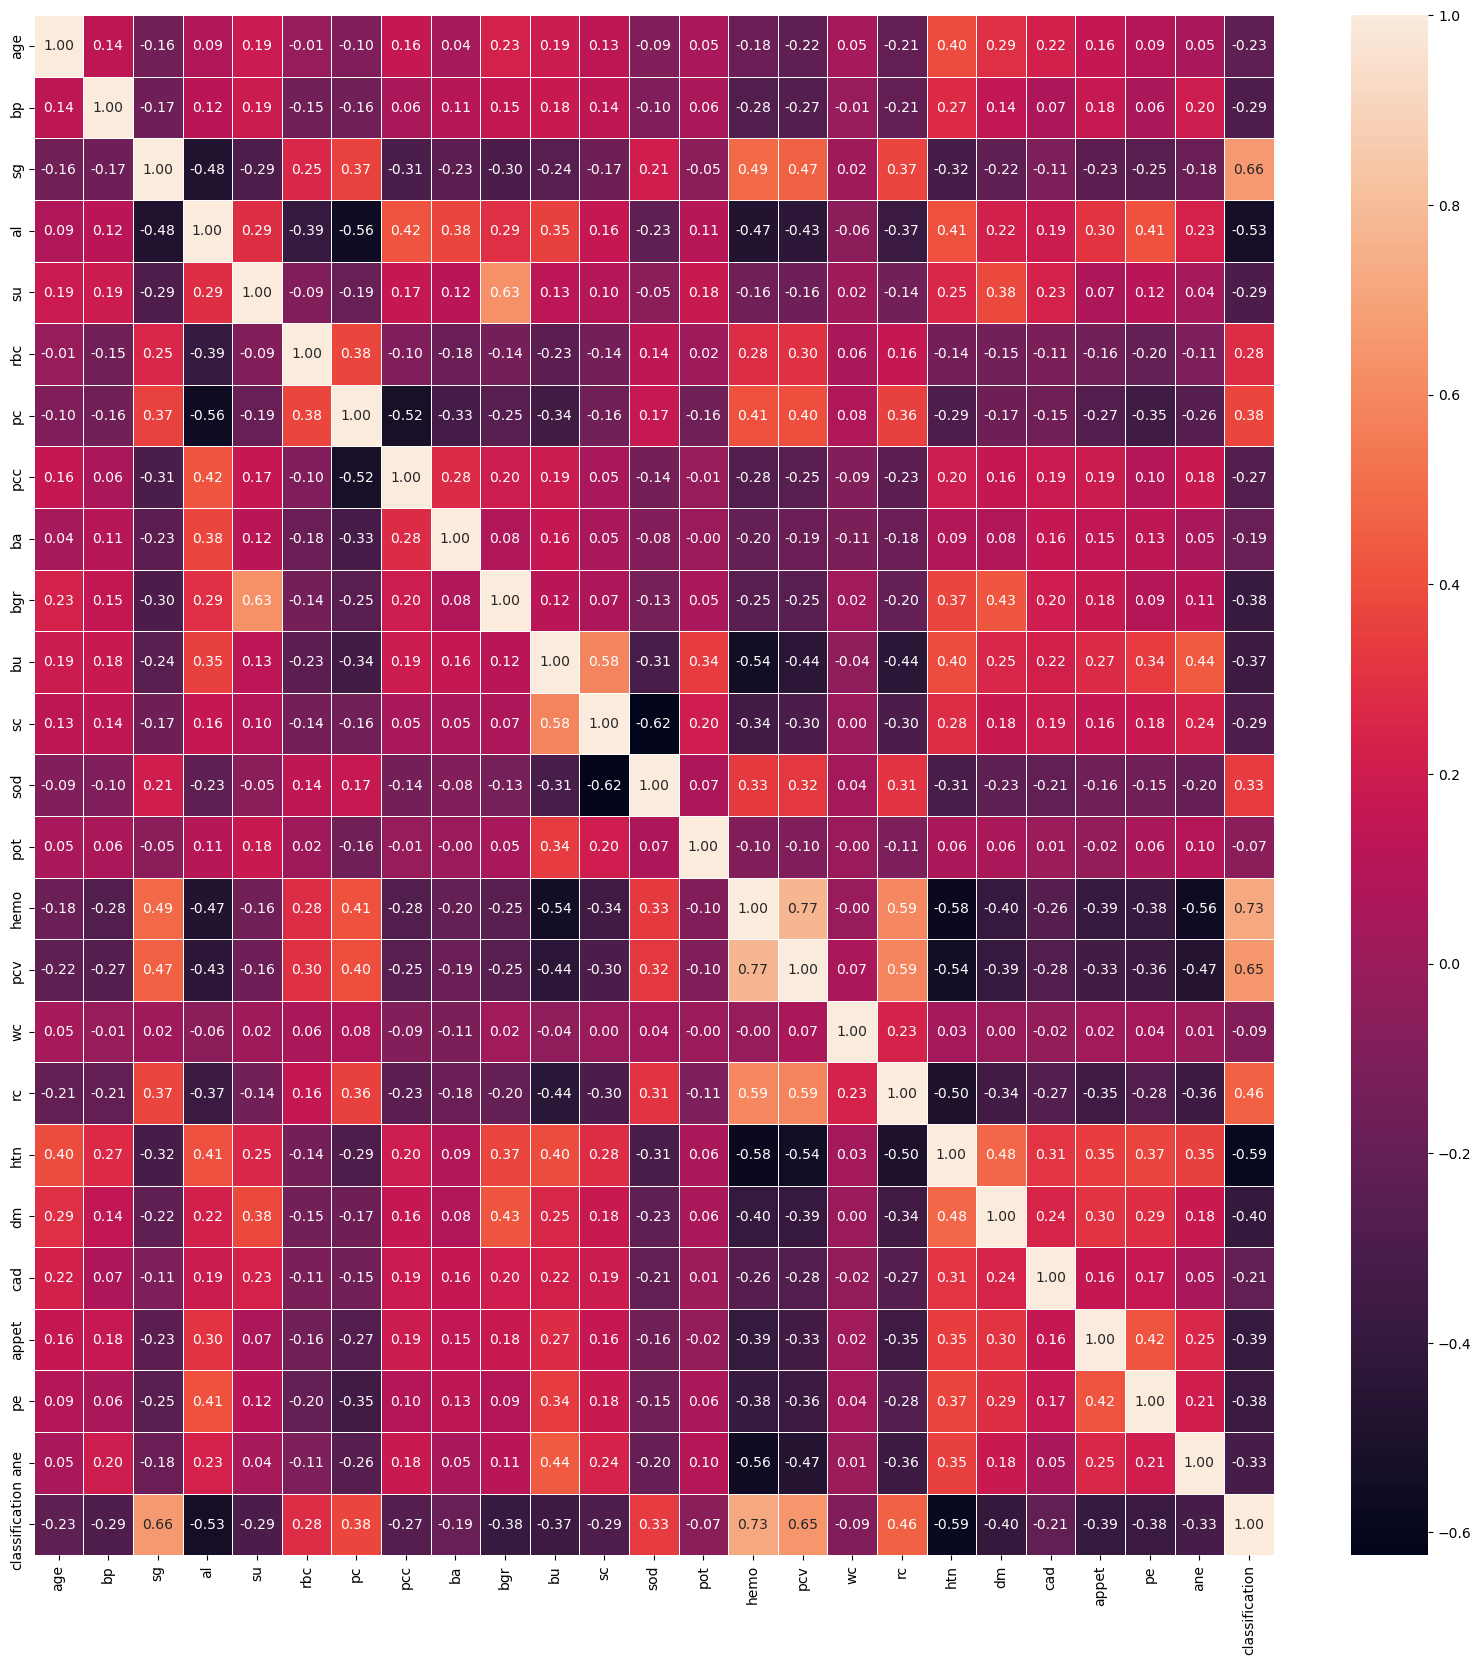

In [38]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [39]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.136316,-0.160374,0.085918,0.186750,-0.014904,-0.102286,0.157401,0.042427,0.230731,...,-0.221045,0.047253,-0.211192,0.395073,0.292977,0.224295,0.156581,0.094772,0.052938,-0.227842
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,-0.150384,-0.156231,0.056808,0.110164,0.150180,...,-0.266409,-0.013846,-0.211062,0.266901,0.144588,0.070337,0.175054,0.056902,0.195134,-0.293693
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,0.253894,0.365353,-0.306426,-0.231704,-0.299413,...,0.465852,0.018154,0.369359,-0.323643,-0.223240,-0.106423,-0.230975,-0.253803,-0.184155,0.659504
al,0.085918,0.123518,-0.479962,1.000000,0.287751,-0.394844,-0.561713,0.417868,0.377935,0.293150,...,-0.432276,-0.056326,-0.370701,0.406057,0.223956,0.192511,0.303145,0.411080,0.229556,-0.531562
su,0.186750,0.189561,-0.292053,0.287751,1.000000,-0.092940,-0.190062,0.168091,0.119399,0.627002,...,-0.163350,0.021010,-0.144589,0.254268,0.380897,0.227744,0.069216,0.116442,0.042464,-0.294555
rbc,-0.014904,-0.150384,0.253894,-0.394844,-0.092940,1.000000,0.377394,-0.102948,-0.184402,-0.138615,...,0.299237,0.062015,0.161758,-0.140538,-0.146207,-0.113848,-0.160868,-0.199285,-0.107625,0.282642
pc,-0.102286,-0.156231,0.365353,-0.561713,-0.190062,0.377394,1.000000,-0.520118,-0.330401,-0.247665,...,0.398211,0.079813,0.358261,-0.291719,-0.167356,-0.152519,-0.274985,-0.350227,-0.260566,0.375154
pcc,0.157401,0.056808,-0.306426,0.417868,0.168091,-0.102948,-0.520118,1.000000,0.275082,0.195223,...,-0.247335,-0.089209,-0.233754,0.195623,0.160626,0.187283,0.189688,0.104356,0.175861,-0.265313
ba,0.042427,0.110164,-0.231704,0.377935,0.119399,-0.184402,-0.330401,0.275082,1.000000,0.079162,...,-0.185100,-0.112368,-0.183730,0.089046,0.083363,0.160807,0.149126,0.134732,0.052208,-0.186871
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,-0.138615,-0.247665,0.195223,0.079162,1.000000,...,-0.249856,0.024089,-0.201352,0.367816,0.428477,0.204869,0.177285,0.094806,0.112449,-0.379321


In [40]:
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df['classification']

In [41]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [51]:
maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(X_train,y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",(maxaccu)*100,"on Random State =",maxRS)

Best accuracy is  99.16666666666667 on Random State = 31


In [52]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=190,test_size=.3)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB

In [54]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()
ET_model = ExtraTreeClassifier()
ETs_model = ExtraTreesClassifier()
BNB_model = BernoulliNB()
GNB_model = GaussianNB()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model,ET_model,ETs_model,GNB_model,BNB_model ]

In [55]:
accuracy=[]
f1=[]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred= m.predict(X_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)
    
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

Accuracy_Score of  LogisticRegression() is 93.33333333333333
F1 SCore                 91.30434782608695
Confusion Matrix of  LogisticRegression()  is 
 [[70  8]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        78
           1       0.84      1.00      0.91        42

    accuracy                           0.93       120
   macro avg       0.92      0.95      0.93       120
weighted avg       0.94      0.93      0.93       120

**************************************************
Accuracy_Score of  RidgeClassifier() is 90.83333333333333
F1 SCore                 88.42105263157895
Confusion Matrix of  RidgeClassifier()  is 
 [[67 11]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        78
           1       0.79      1.00      0.88        42

    accuracy                           0.91       120
   macro avg       0.90      0.93      0.90       120
weighted avg  

,Model,Accuracy,F1 Score
0,LogisticRegression(),93.33,91.30
1,RidgeClassifier(),90.83,88.42
2,DecisionTreeClassifier(),92.50,89.41
3,SVC(),80.83,78.10
4,KNeighborsClassifier(),80.83,77.23
5,"(DecisionTreeClassifier(max_features='sqrt', r...",95.83,94.12
6,"XGBClassifier(base_score=None, booster=None, c...",93.33,90.70
7,SGDClassifier(),65.83,66.67
8,(DecisionTreeClassifier(random_state=625801382...,92.50,89.41
9,"(DecisionTreeClassifier(max_depth=1, random_st...",95.00,92.68


In [56]:
ETs_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [57]:
from scipy.stats import randint

In [58]:
parameter = {"max_depth": randint(1,10),
    "max_features": ["sqrt", "log2", None],
    'random_state':randint(50,300),
    "min_samples_leaf": randint(1, 9),
    'n_estimators':randint(10,100),
    'n_jobs':[-2,-1,1],
    "criterion": ["gini", "entropy"],
    'class_weight' :["balanced", "balanced_subsample"],
    'min_samples_split': randint(1,10)}

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
GCV=RandomizedSearchCV(ETs_model,parameter,cv=5)
GCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002710F0905C0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027111A220F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027111A210D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027111A20F50>,
                                        'n_jobs': [-2, -1, 1],
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002710ED9EC30>})

In [61]:
GCV.best_estimator_

ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=8,
                     max_features=None, min_samples_split=8, n_estimators=23,
                     n_jobs=1, random_state=111)

In [62]:
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 23,
 'n_jobs': 1,
 'random_state': 111}

In [63]:
GCV_pred=GCV.best_estimator_.predict(X_test)
accuracy_score(y_test,GCV_pred)

0.9583333333333334

<Axes: >

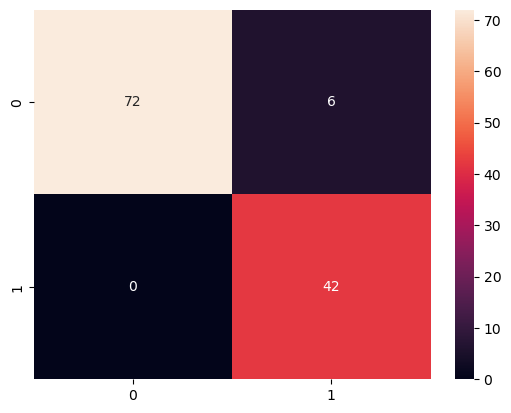

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [65]:
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay,auc

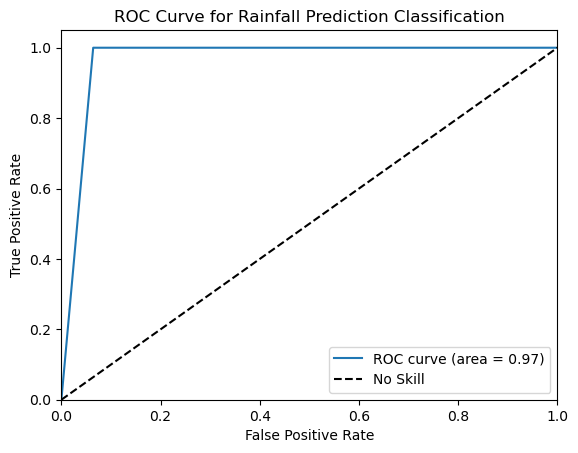

In [66]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,GCV_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rainfall Prediction Classification')
plt.legend()
plt.show()

In [67]:
import joblib
joblib.dump(ETs_model,"kidney.pkl")

['kidney.pkl']

In [68]:

a = np.array(y_test)
df = pd.DataFrame()
df['Prediction'] = GCV_pred
df['original'] = a
df

,Prediction,original
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
115,0,0
116,0,0
117,1,0
118,1,1
